In [2]:
# %load imports.py
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
plt.style.use('ggplot')
#Plot styling/configurations 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 14,8
plt.rcParams['axes.facecolor']='white'
plt.rcParams.update({'font.size': 13})
import warnings
warnings.filterwarnings('ignore')
seq_col_brew = sns.color_palette("YlGnBu_r", 4)
sns.set_palette(seq_col_brew)
pd.set_option('display.height', 1000) 
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
#The difference is the best programmers/problem-solvers are more curious about bugs/errors than irritated.
#1. Understand the problem. “If you can’t explain something in simple terms, you don’t understand it.” RF.
#2. Plan
#3. Divide (first start with a solution that's more simple)
#4. Stuck? Google, take a deep breath, come back.

In [3]:
train = pd.read_csv('train.csv', usecols=['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'CentralAir', 'FullBath', 'KitchenQual', 'Fireplaces', 'SalePrice'])
test = pd.read_csv('test.csv', usecols=['OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'CentralAir', 'FullBath', 'KitchenQual', 'Fireplaces'])

In [4]:
train.rename(columns={'OverallQual': 'overallquality', 'OverallCond': 'overallcondition',
                    'YearBuilt': 'yb', 'YearRemodAdd': 'yearremodeled',
                    'CentralAir': 'centralair', 'FullBath': 'fullbath',
                    'KitchenQual': 'kitchenquality', 'Fireplaces': 'fireplaces',
                    'SalePrice': 'saleprice'
                   }, inplace=True)

In [5]:
test.rename(columns={'OverallQual': 'overallquality', 'OverallCond': 'overallcondition',
                    'YearBuilt': 'yb', 'YearRemodAdd': 'yearremodeled',
                    'CentralAir': 'centralair', 'FullBath': 'fullbath',
                    'KitchenQual': 'kitchenquality', 'Fireplaces': 'fireplaces'
                   }, inplace=True)

In [6]:
test.head()

,overallquality,overallcondition,yb,yearremodeled,centralair,fullbath,kitchenquality,fireplaces
0,5,6,1961,1961,Y,1,TA,0
1,6,6,1958,1958,Y,1,Gd,0
2,5,5,1997,1998,Y,2,TA,1
3,6,6,1998,1998,Y,2,Gd,1
4,8,5,1992,1992,Y,2,Gd,0


In [7]:
x = train[['overallquality', 'overallcondition', 'yb', 'yearremodeled', 'centralair', 'fullbath', 'kitchenquality', 'fireplaces']]
y = train['saleprice']

# Memory Optimization

In [9]:
train.memory_usage().sum()

105200

In [11]:
train.dtypes

overallquality       int64
overallcondition     int64
yb                   int64
yearremodeled        int64
centralair          object
fullbath             int64
kitchenquality      object
fireplaces           int64
saleprice            int64
dtype: object

In [20]:
for i in train.columns:
    if train[i].dtypes == 'int64':
        train[i] = train[i].astype('uint16')
    if train[i].dtypes == 'object':
        train[i] = train[i].astype('category')

In [21]:
train.dtypes

overallquality        uint16
overallcondition      uint16
yb                    uint16
yearremodeled         uint16
centralair          category
fullbath              uint16
kitchenquality      category
fireplaces            uint16
saleprice             uint16
dtype: object

In [22]:
train.memory_usage().sum()

23728

In [23]:
23728 / 105200 * 100

22.55513307984791

# Summary Analysis

In [96]:
x.head()

,overallquality,overallcondition,yb,yearremodeled,centralair,fullbath,kitchenquality,fireplaces
0,7,5,2003,2003,Y,2,Gd,0
1,6,8,1976,1976,Y,2,TA,1
2,7,5,2001,2002,Y,2,Gd,1
3,7,5,1915,1970,Y,1,Gd,1
4,8,5,2000,2000,Y,2,Gd,1


In [97]:
x['overallquality'].value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: overallquality, dtype: int64

In [98]:
x['overallcondition'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: overallcondition, dtype: int64

In [99]:
x['yb'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
1965    24
1970    24
1954    24
2000    24
2002    23
2008    23
1972    23
1968    22
1971    22
1950    20
2001    20
1957    20
1962    19
1994    19
1966    18
2009    18
1995    18
1940    18
1910    17
1960    17
1993    17
1978    16
1955    16
1925    16
1963    16
1967    16
1996    15
1941    15
1964    15
1969    14
1956    14
1961    14
1997    14
1948    14
1992    13
1990    12
1953    12
1949    12
1988    11
1973    11
1915    10
1900    10
1980    10
1974    10
1979     9
1926     9
1930     9
1936     9
1984     9
1939     8
1922     8
1975     8
1916     8
1924     7
1928     7
1918     7
1914     7
1923     7
1946     7
1935     6
1945     6
1931     6
1982     6
1921     6
1951     6
1985     5
1937     5
1947     5
1991     5
1981     5
1986     5
1952     5
1880     4
1929     4
1932     4
1938     4
1983     4
1927     3
1919     3

In [100]:
x['yearremodeled'].value_counts()

1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
1976     30
1999     30
1970     26
1997     25
1977     25
2009     23
1994     22
2001     21
1972     20
1965     19
1993     19
1971     18
1959     18
1968     17
1992     17
1978     16
1966     15
1958     15
1990     15
1962     14
1954     14
1969     14
1991     14
1963     13
1960     12
1967     12
1980     12
1973     11
1964     11
1989     11
1987     10
1975     10
1979     10
1956     10
1953     10
1957      9
1988      9
1955      9
1985      9
1961      8
1981      8
1974      7
1982      7
1984      7
2010      6
1983      5
1952      5
1986      5
1951      4
Name: yearremodeled, dtype: int64

In [101]:
x['centralair'].value_counts()

Y    1365
N      95
Name: centralair, dtype: int64

In [102]:
x['fullbath'].value_counts()

2    768
1    650
3     33
0      9
Name: fullbath, dtype: int64

In [103]:
#For the future there is a lot of interesting things you could do here
train.isnull().sum()

overallquality      0
overallcondition    0
yb                  0
yearremodeled       0
centralair          0
fullbath            0
kitchenquality      0
fireplaces          0
saleprice           0
dtype: int64

In [104]:
#Check with a chart how it affects the price
x['kitchenquality'].value_counts()

TA    735
Gd    586
Ex    100
Fa     39
Name: kitchenquality, dtype: int64

In [105]:
x['fireplaces'].value_counts()

0    690
1    650
2    115
3      5
Name: fireplaces, dtype: int64

In [106]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
overallquality      1460 non-null int64
overallcondition    1460 non-null int64
yb                  1460 non-null int64
yearremodeled       1460 non-null int64
centralair          1460 non-null object
fullbath            1460 non-null int64
kitchenquality      1460 non-null object
fireplaces          1460 non-null int64
dtypes: int64(6), object(2)
memory usage: 91.3+ KB


In [107]:
x.describe()

,overallquality,overallcondition,yb,yearremodeled,fullbath,fireplaces
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,6.099315,5.575342,1971.267808,1984.865753,1.565068,0.613014
std,1.382997,1.112799,30.202904,20.645407,0.550916,0.644666
min,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000
25%,5.000000,5.000000,1954.000000,1967.000000,1.000000,0.000000
50%,6.000000,5.000000,1973.000000,1994.000000,2.000000,1.000000
75%,7.000000,6.000000,2000.000000,2004.000000,2.000000,1.000000
max,10.000000,9.000000,2010.000000,2010.000000,3.000000,3.000000


In [108]:
train.corr()

,overallquality,overallcondition,yb,yearremodeled,fullbath,fireplaces,saleprice
overallquality,1.000000,-0.091932,0.572323,0.550684,0.550600,0.396765,0.790982
overallcondition,-0.091932,1.000000,-0.375983,0.073741,-0.194149,-0.023820,-0.077856
yb,0.572323,-0.375983,1.000000,0.592855,0.468271,0.147716,0.522897
yearremodeled,0.550684,0.073741,0.592855,1.000000,0.439046,0.112581,0.507101
fullbath,0.550600,-0.194149,0.468271,0.439046,1.000000,0.243671,0.560664
fireplaces,0.396765,-0.023820,0.147716,0.112581,0.243671,1.000000,0.466929
saleprice,0.790982,-0.077856,0.522897,0.507101,0.560664,0.466929,1.000000


# Plotting

## OverallQual

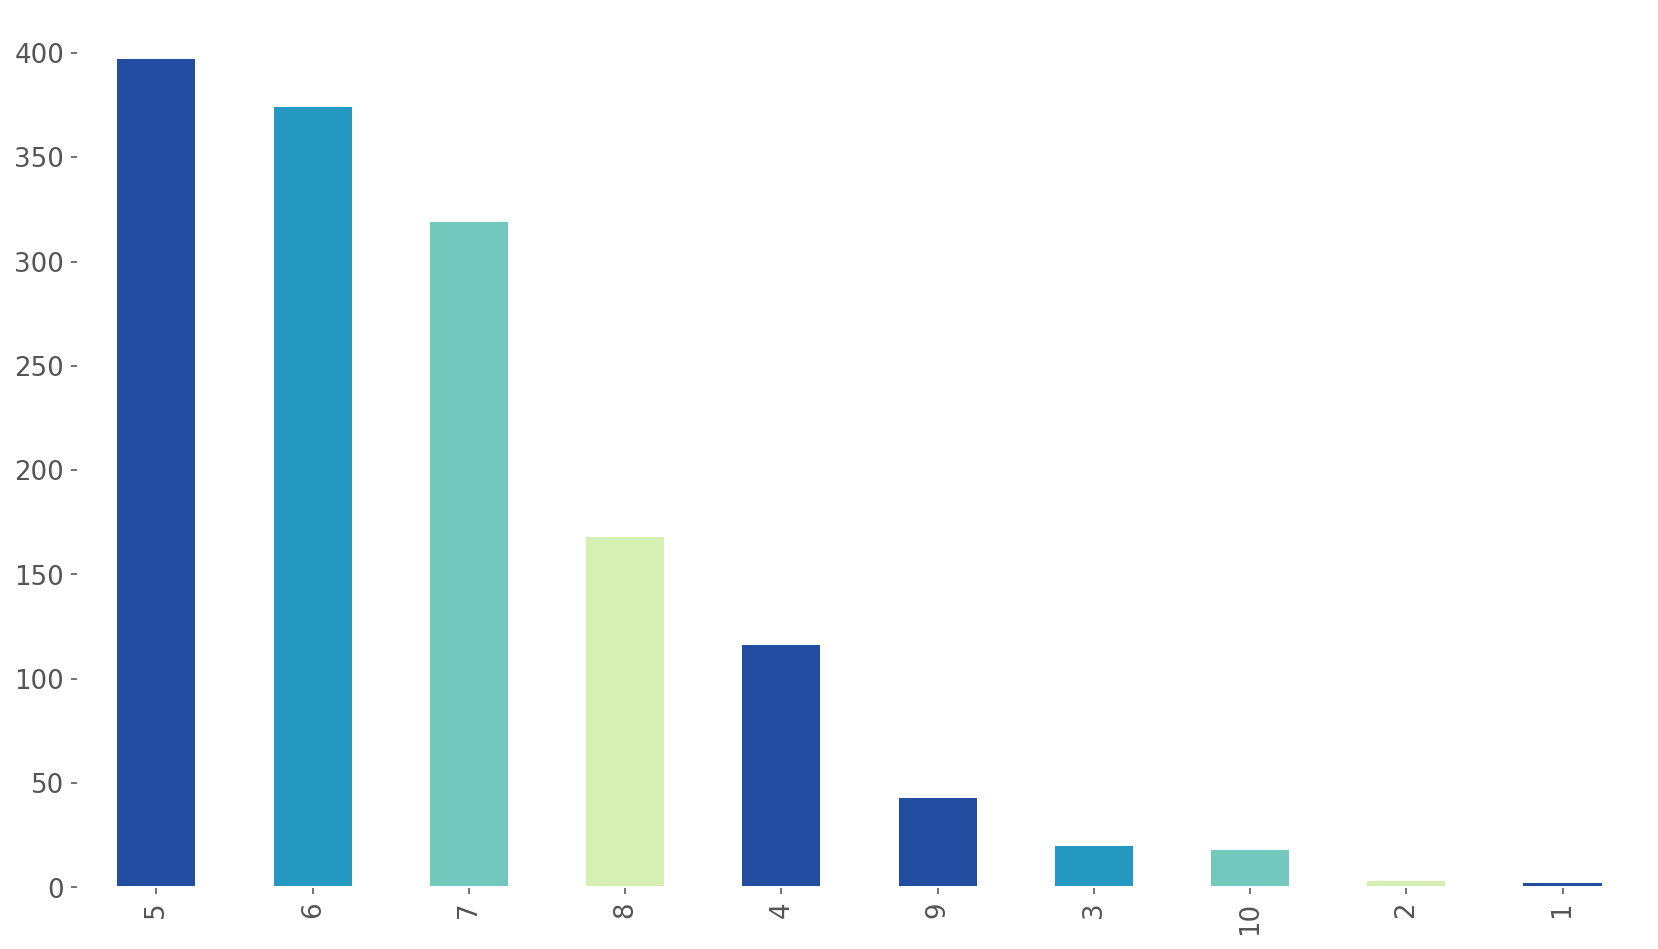

In [109]:
x['overallquality'].value_counts().plot.bar()

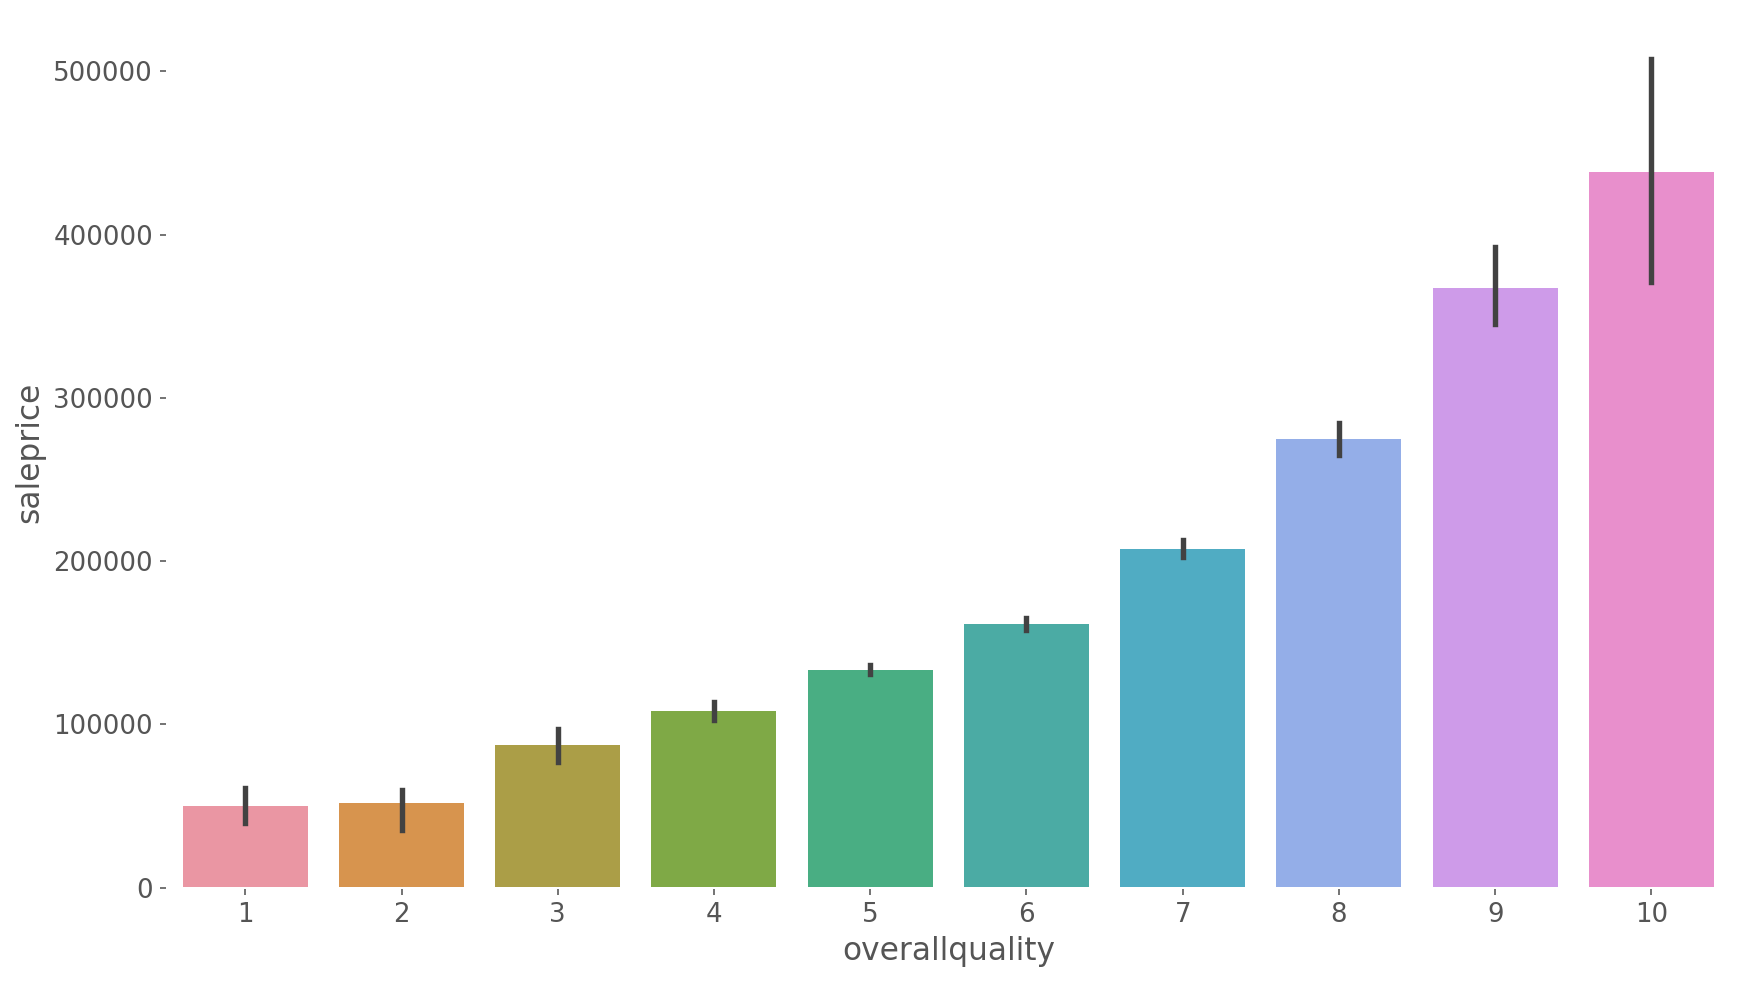

In [110]:
sns.barplot(x='overallquality', y='saleprice', data=train)

### OverallCond

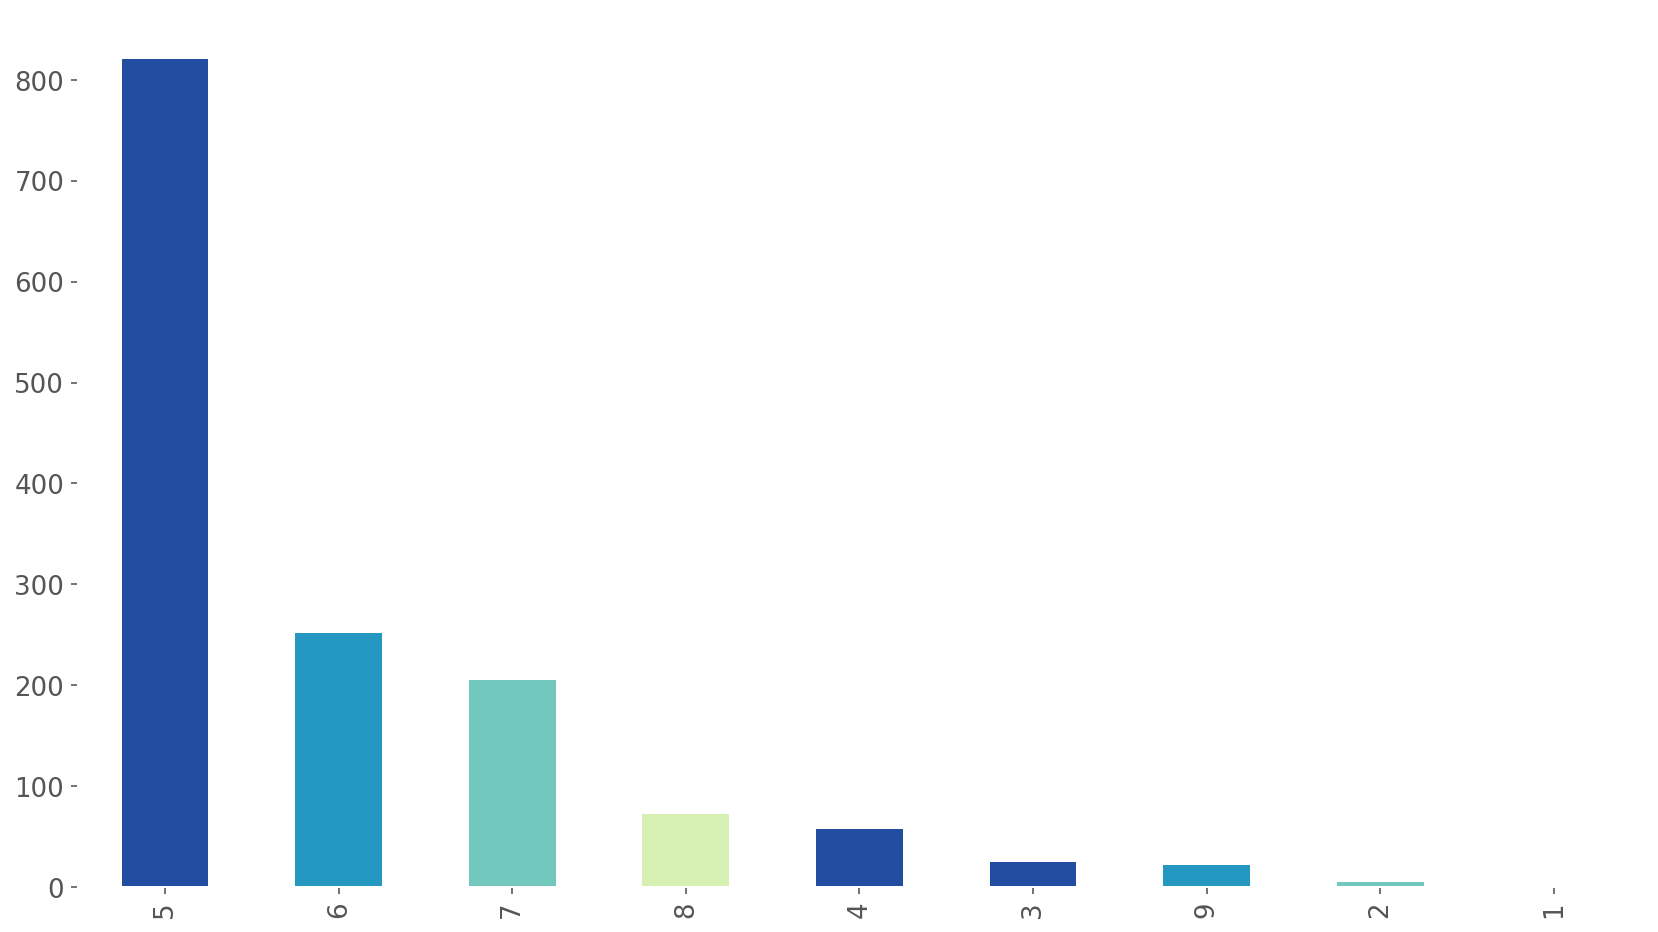

In [111]:
x['overallcondition'].value_counts().plot.bar()

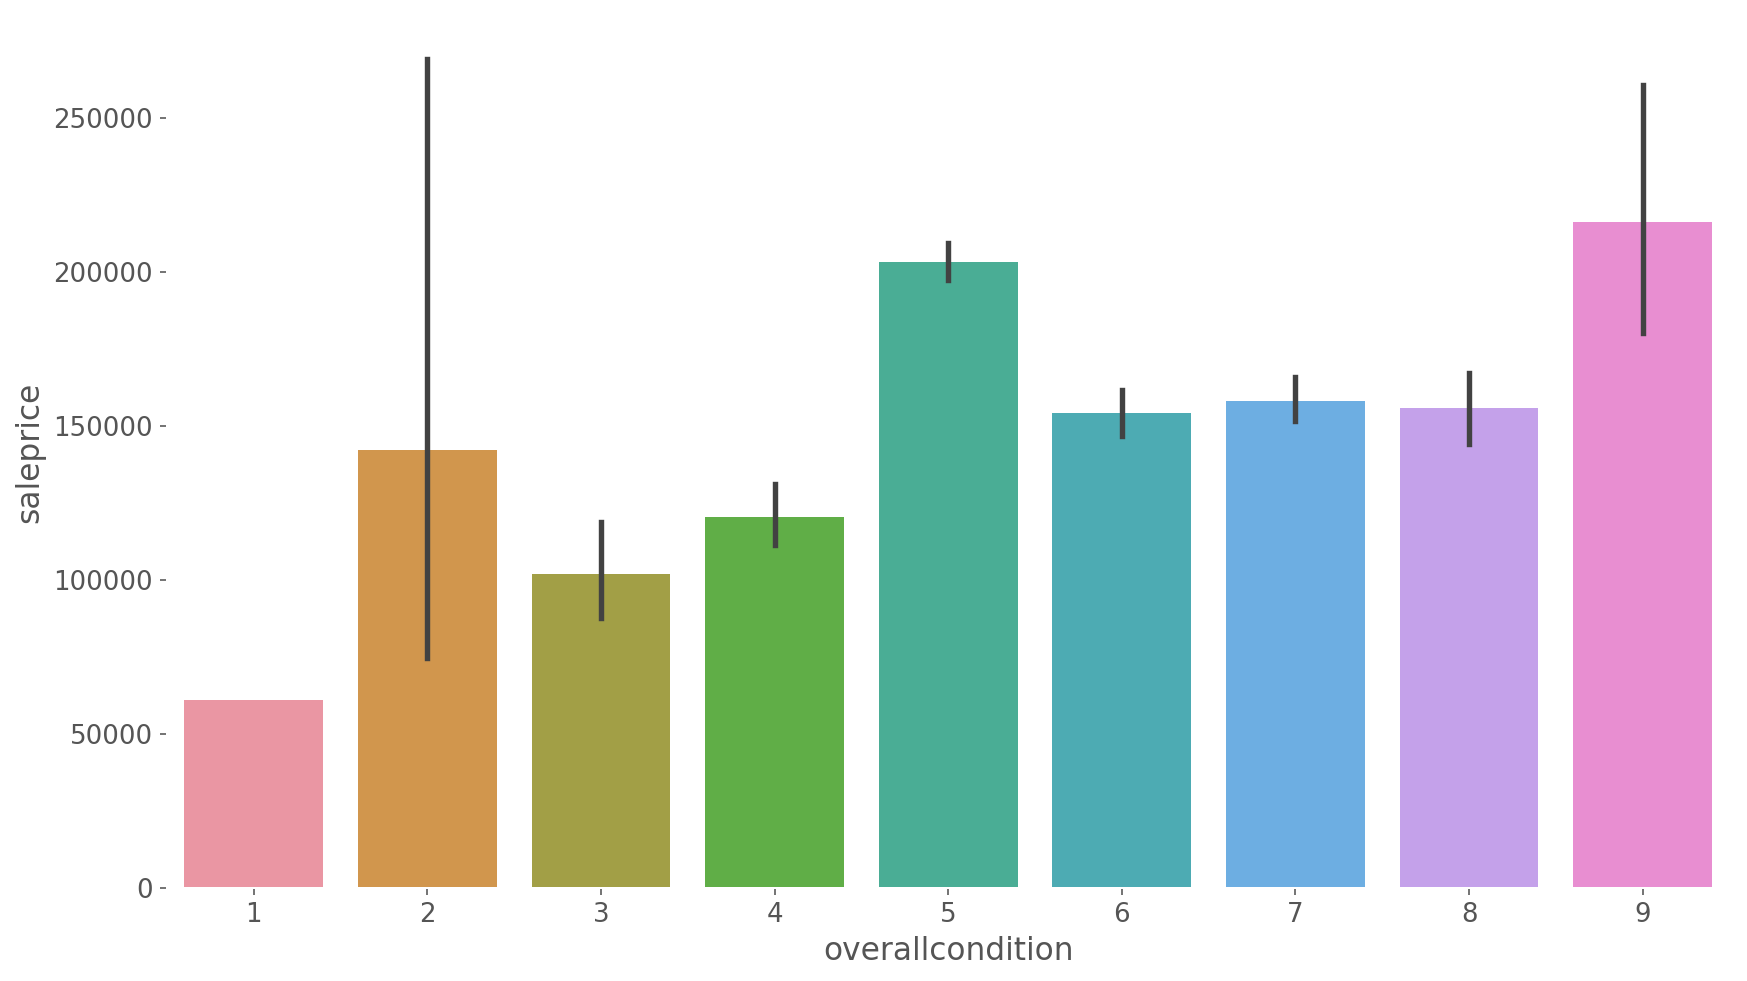

In [112]:
sns.barplot(x='overallcondition', y='saleprice', data=train)

### YearBuilt

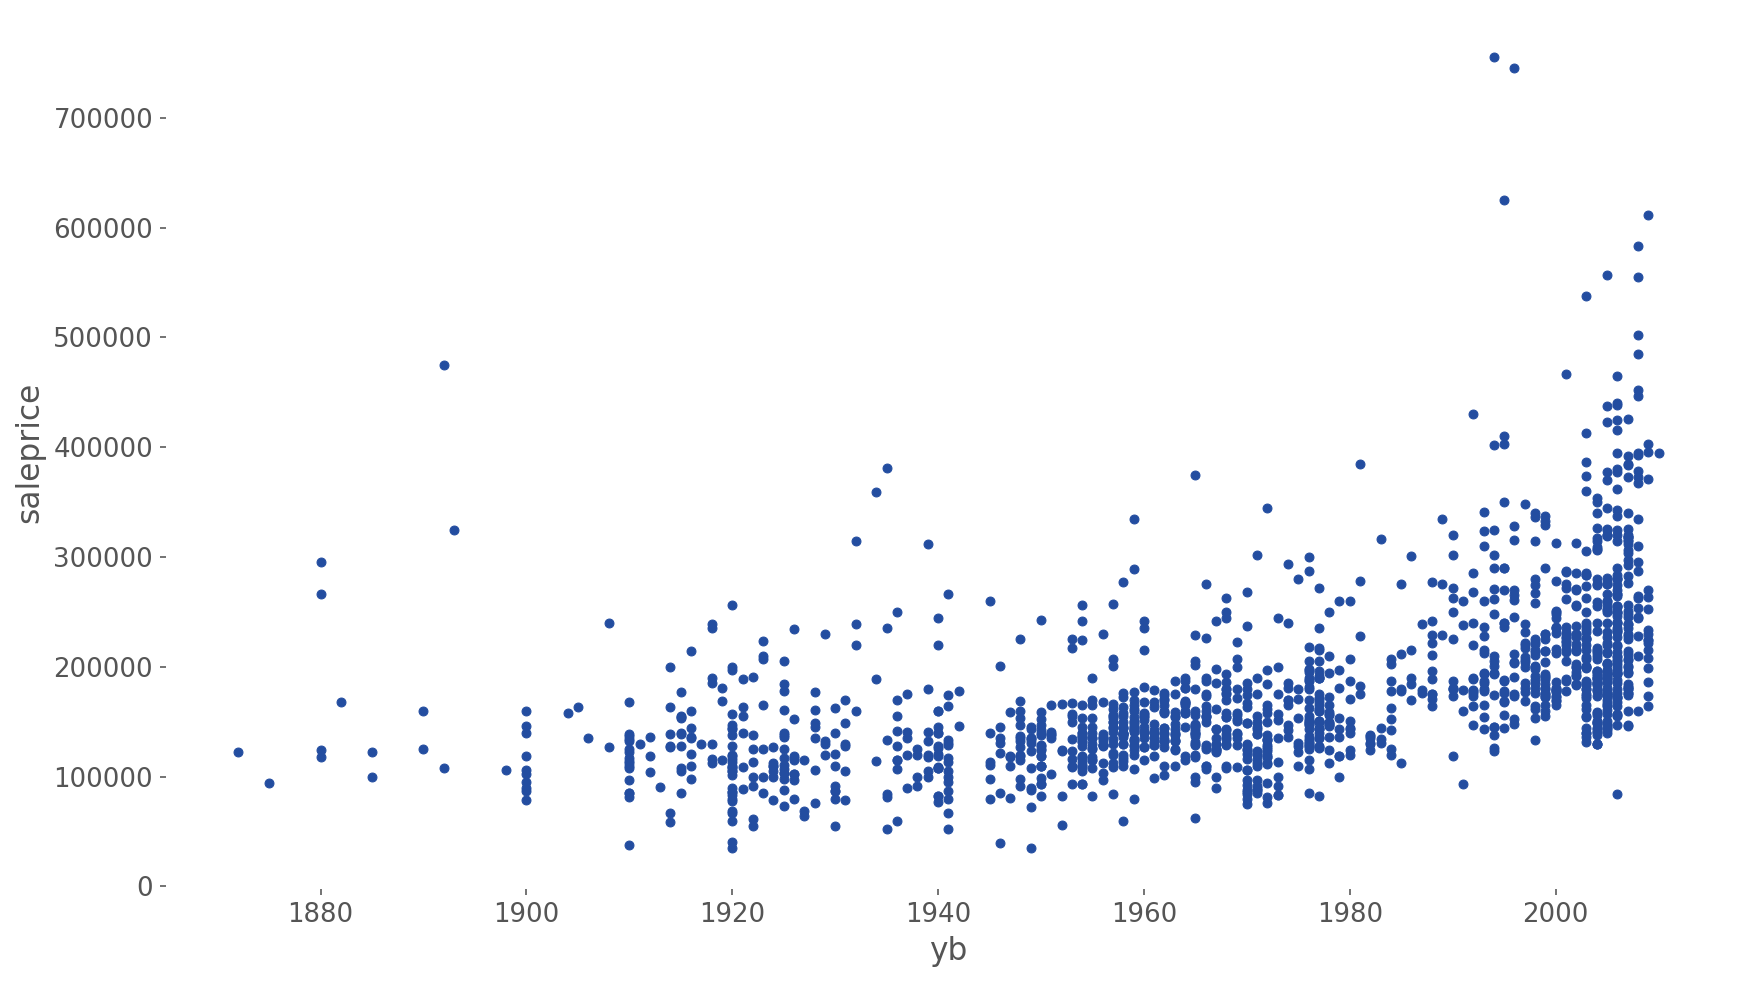

In [113]:
train.plot.scatter(x='yb', y='saleprice')

### YearRemodAdd

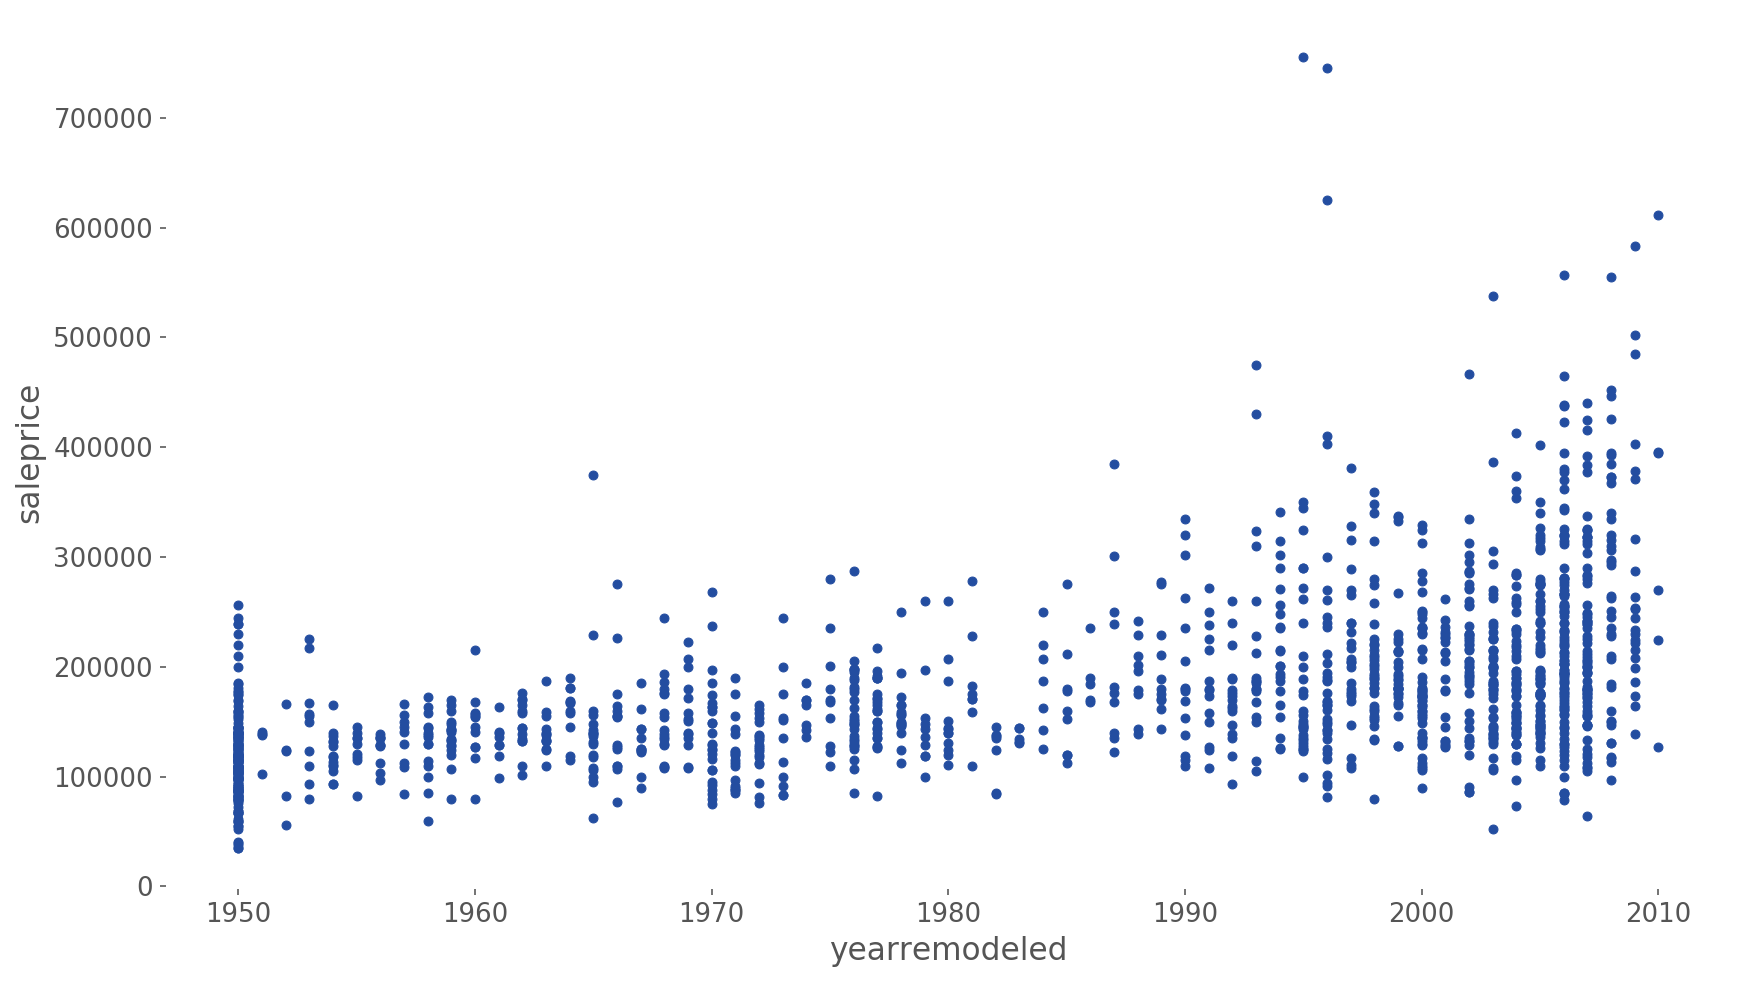

In [114]:
train.plot.scatter(x='yearremodeled', y='saleprice')

### FullBath

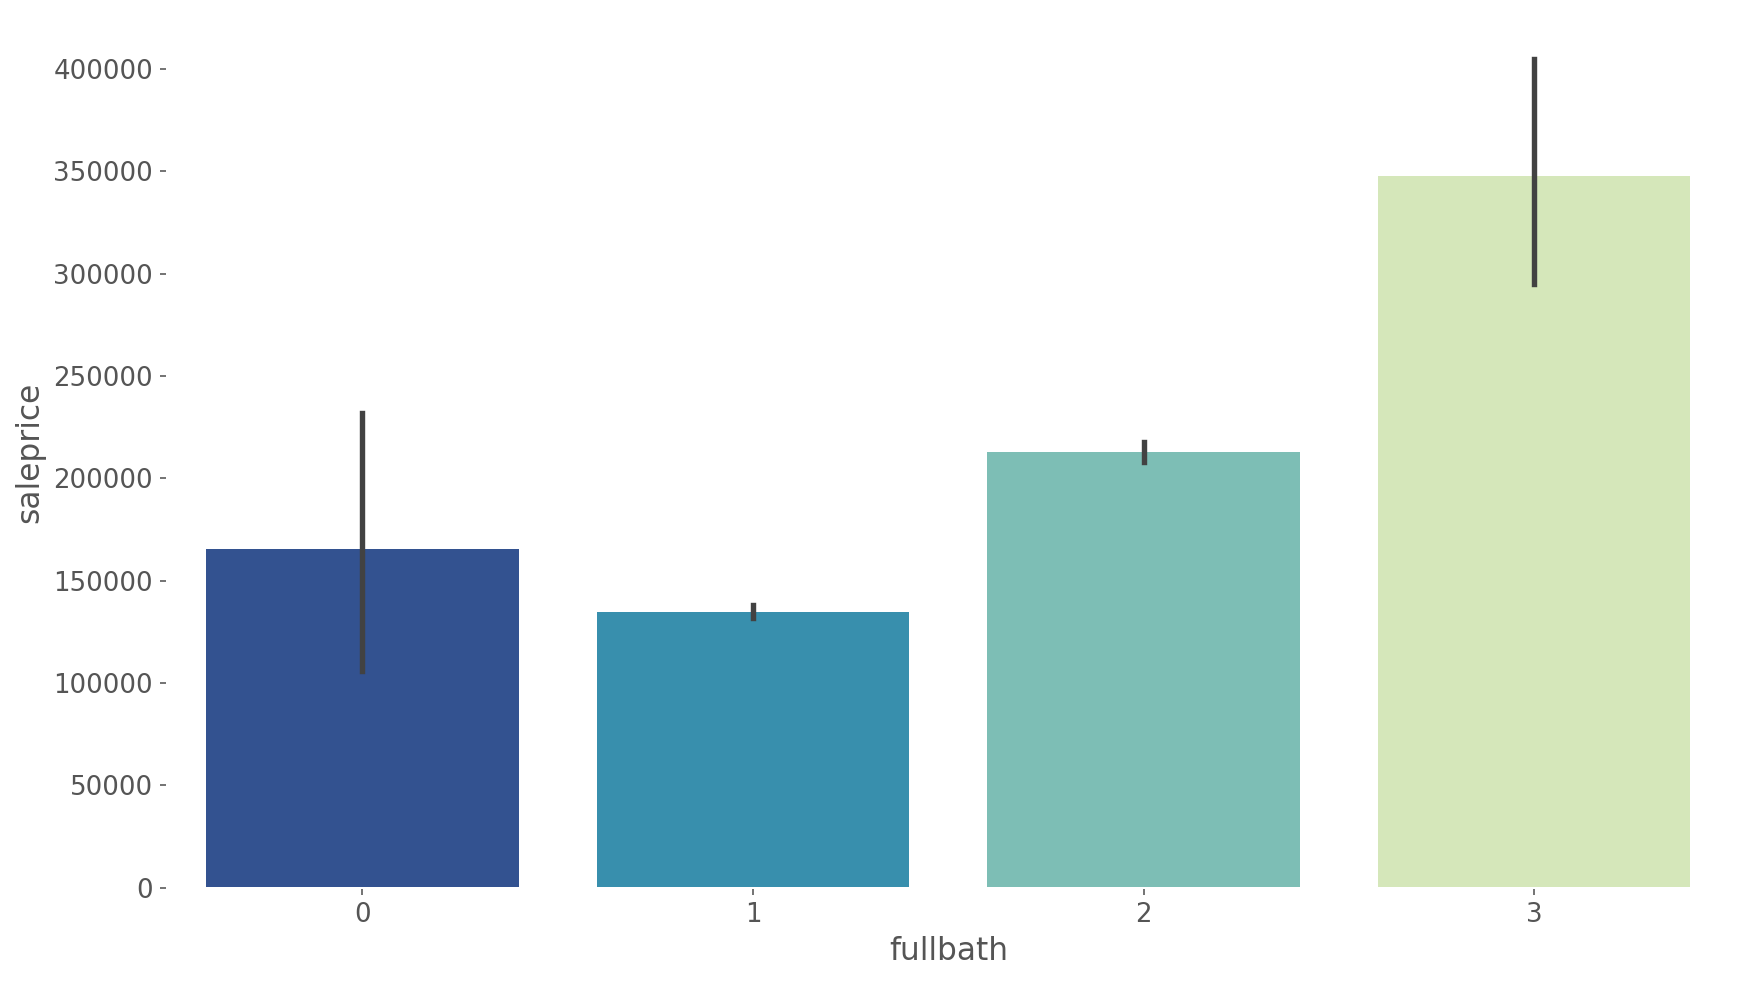

In [115]:
sns.barplot(x='fullbath', y='saleprice', data=train)

### Fireplaces

In [2]:
sns.factorplot(x='fireplaces', y='saleprice', size=8, aspect=2, data=train)

NameError: name 'sns' is not defined

### SalePrice

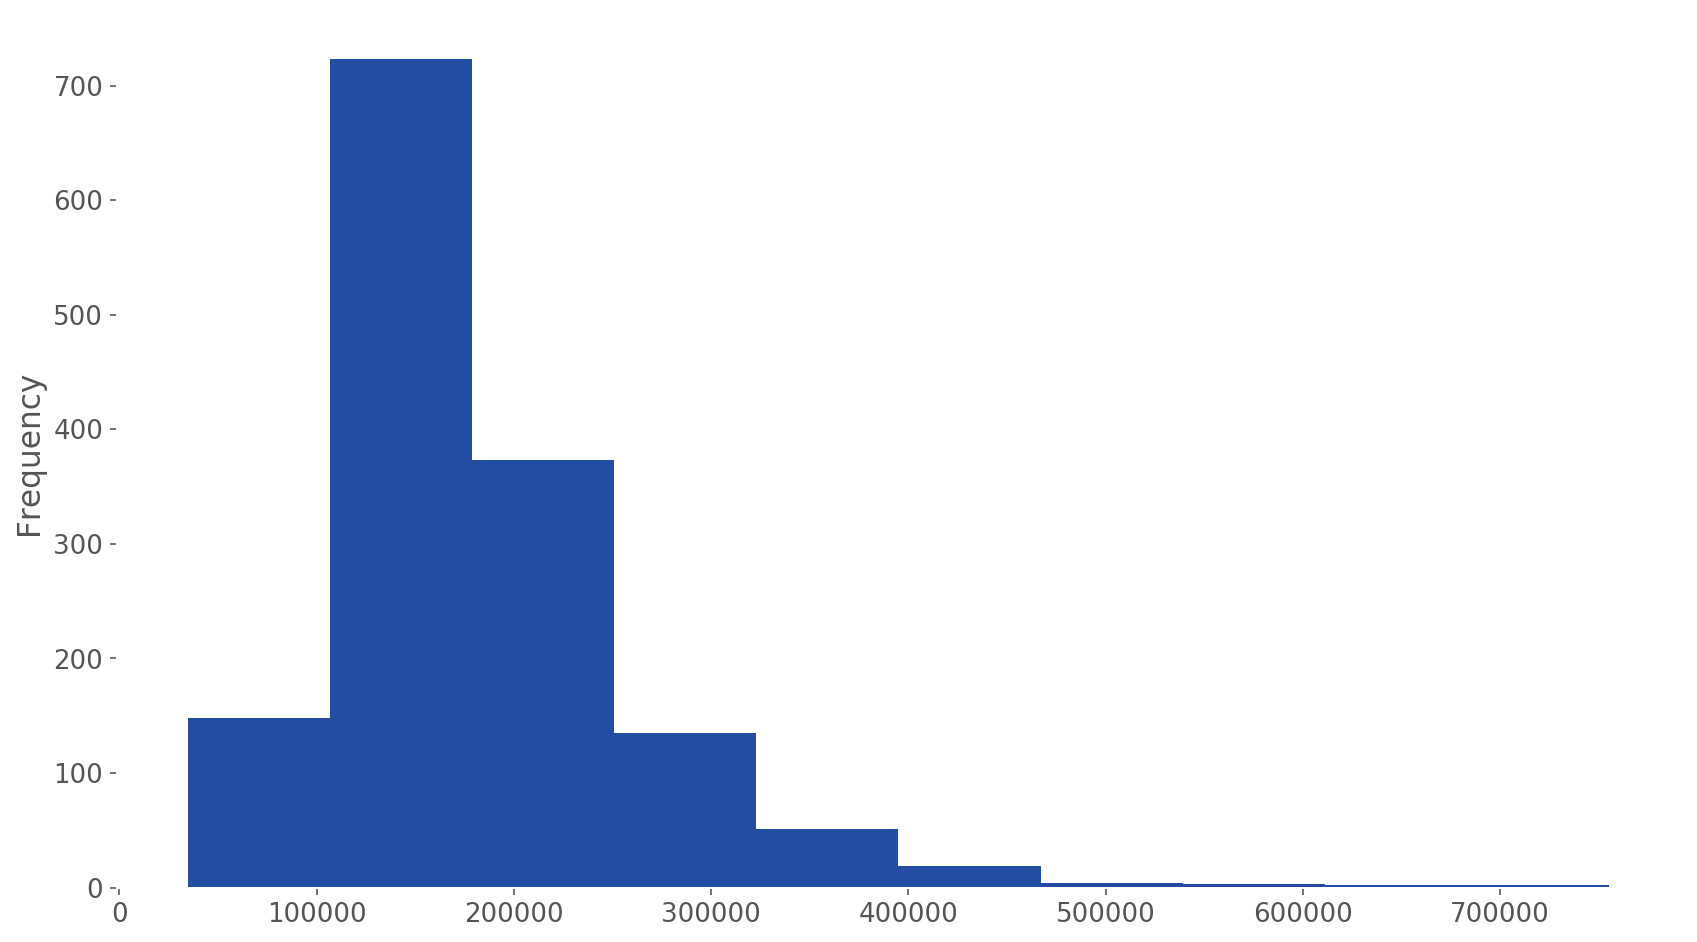

In [117]:
y.plot.hist()

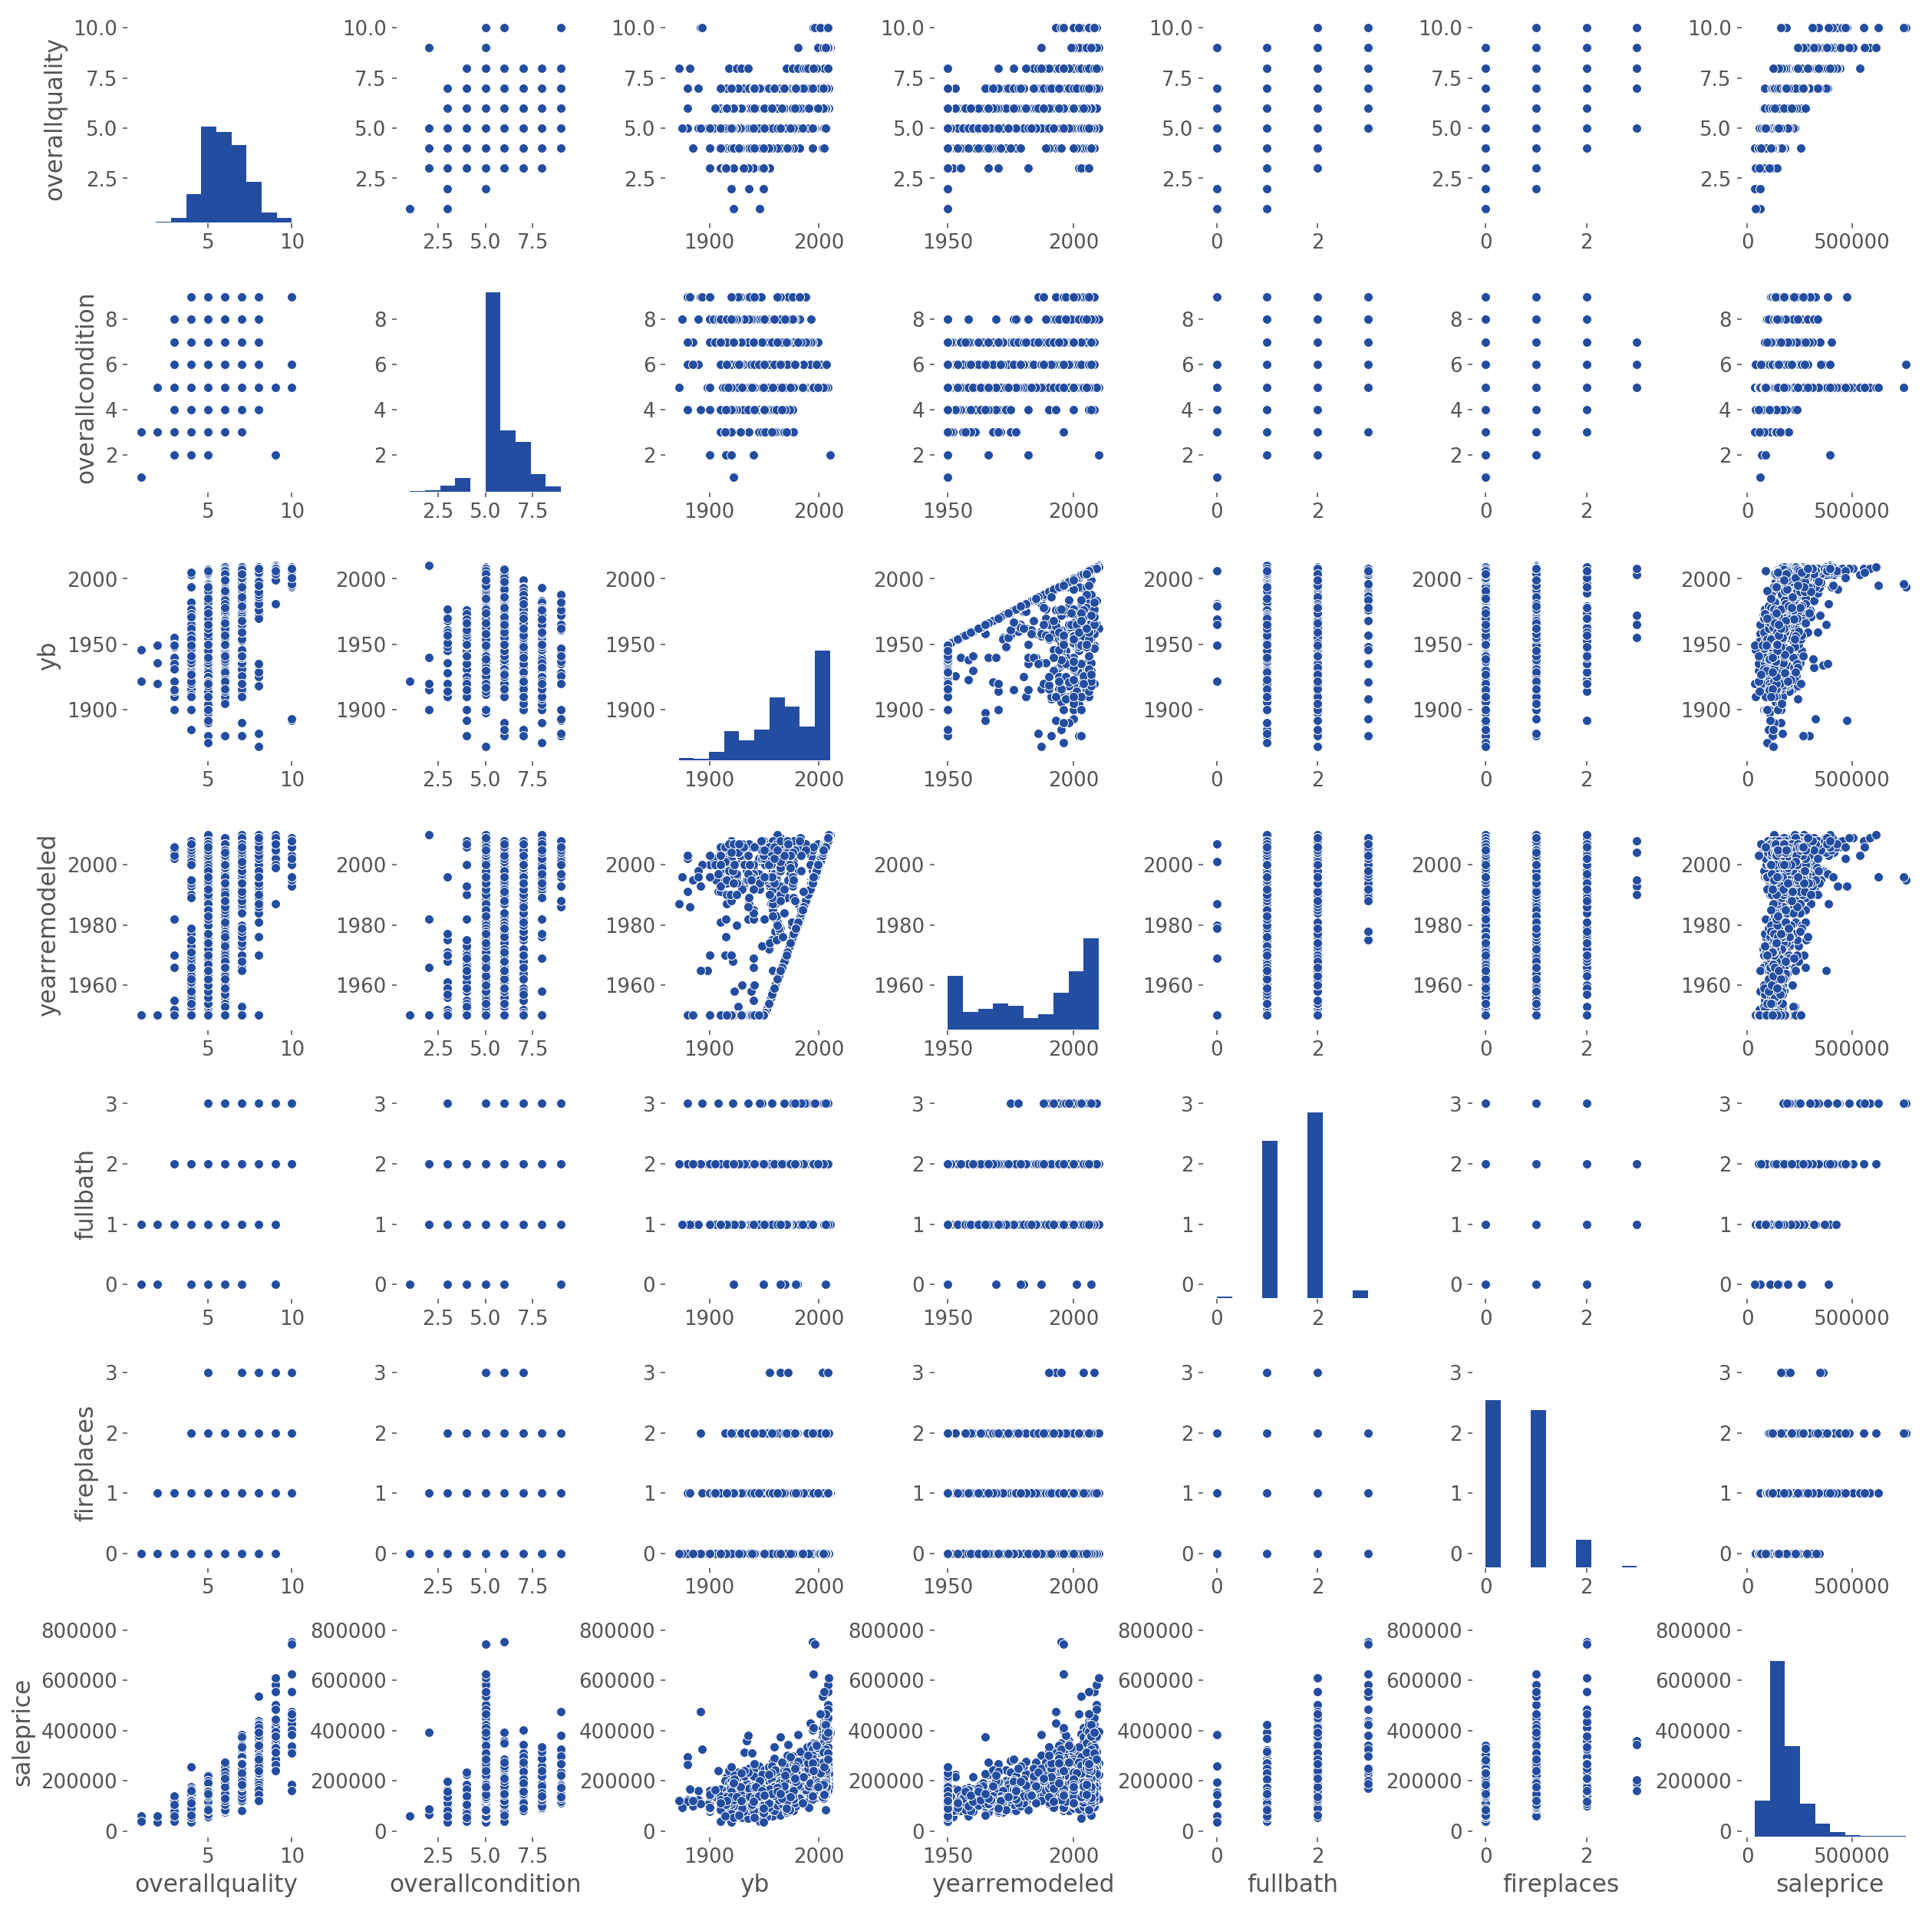

In [118]:
sns.pairplot(train)

In [119]:
x.dtypes

overallquality       int64
overallcondition     int64
yb                   int64
yearremodeled        int64
centralair          object
fullbath             int64
kitchenquality      object
fireplaces           int64
dtype: object

## Conclusion
- OverallQual categorical encoding. Maybe feature scaling?
- OverallCond categorical encoding. Maybe feature scaling?
- Yearbuilt convert to datetime. Maybe feature scaling?
- YearRemodAdd convert to datetime. 
- CentralAir leave as is.
- FullBath leave as is.
- KitchenQaul categorical encoding
- Fireplace leave as is.

In [120]:
x.head()

,overallquality,overallcondition,yb,yearremodeled,centralair,fullbath,kitchenquality,fireplaces
0,7,5,2003,2003,Y,2,Gd,0
1,6,8,1976,1976,Y,2,TA,1
2,7,5,2001,2002,Y,2,Gd,1
3,7,5,1915,1970,Y,1,Gd,1
4,8,5,2000,2000,Y,2,Gd,1


In [121]:
x.dtypes

overallquality       int64
overallcondition     int64
yb                   int64
yearremodeled        int64
centralair          object
fullbath             int64
kitchenquality      object
fireplaces           int64
dtype: object

# Feature Engineering

### Covert dtype

In [136]:
for i in test.columns:
    if test[i].dtype == 'O':
        test[i] = test[i].astype('category')

### Label Encoder for Central Air

In [137]:
test['centralair'] = test['centralair'].cat.codes

### Yearbuilt

In [138]:
test['yb'] = pd.to_datetime(test['yb'])

In [139]:
test['yb'] = test['yb'].dt.year

### yearremodeled

In [140]:
test['yearremodeled'] = pd.to_datetime(test['yearremodeled'])

In [141]:
test['yearremodeled'] = test['yearremodeled'].dt.year

### kitchenquality

In [142]:
test['kitchenquality'] = test['kitchenquality'].cat.codes

# Splitting strategy here

# Model selection and tuning

In [129]:
# %load imports_models.py
# %load imports.py
#Linear regression models
from sklearn.linear_model import LinearRegression

#Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#Now it would be very remarkable if any system existing in the real
#world could be exactly represented by any simple model. However,
#cunningly chosen parsimonious models often do provide remarkably useful
#approximations. For example, the law PV = RT relating pressure P, volume
#V and temperature T of an "ideal" gas via a constant R is not exactly
#true for any real gas, but it frequently provides a useful approximation
#and furthermore its structure is informative since it springs from a
#physical view of the behavior of gas molecules. For such a model there is
#no need to ask the question "Is the model true?". If "truth" is to be the
#"whole truth" the answer must be "No". The only question of interest
#is "Is the model illuminating and useful?"

In [131]:
lr = LinearRegression(n_jobs=-1)

# Fitting the model

In [132]:
model_fit = lr.fit(x, y)

In [133]:
model_fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [134]:
model_fit.score(x,y)

0.7069579602235916

In [158]:
pred = model_fit.predict(test)

In [159]:
type(pred)

numpy.ndarray

In [160]:
pred

array([110816.75156793, 159996.75954095, 155201.55212912, ...,
       132632.26064109, 109884.84167619, 212351.15588172])

In [156]:
sample = pd.read_csv('sample_submission.csv')

In [161]:
sample['SalePrice'] = pred

In [164]:
sample.to_csv('my_submission.csv', index=False)

In [166]:
sample.head()

,Id,SalePrice
0,1461,110816.751568
1,1462,159996.759541
2,1463,155201.552129
3,1464,205313.469994
4,1465,240647.564673


#### Tracking your models
- Write a log of all the features you created
- Write a log of your score local validation
- Write model parameters
- Write scores from Kaggle